# Proyek Analisis Data: [Bike Sharing Dataset]
- **Nama:** [Lutfi Aundrie Hermawan]
- **Email:** [lutfiaunher@gmail.com]
- **ID Dicoding:** [Lutfi Hermawan]

## Menentukan Pertanyaan Bisnis

- Bagaimana musim dapat berpengaruh dalam penyewaan sepeda ?
- Bagaimana kepopuleran penyewaan sepeda dalam setahun terakhir, apakah 2011 atau 2012 ?
- Bagaimana cuaca dapat mempengaruhi dalam penyewaan sepeda ?
- Berapa banyaknya seseorang yang memilih registered dibandingkan casual ?
- Apakah suhu lingkungan atau suhu yang dirasakan tubuh manusia dapat mempengaruhi jumlah penyewaan ?

## Import Semua Packages/Library yang Digunakan

In [1]:
# Perintah untuk menginstall library
!pip install numpy
!pip install pandas
!pip install matplotlib
!pip install seaborn

# Library yang akan dipakai
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

Tahap pertama kita mengumpulkan data yang telah dikumpulkan sebagai DataFrame. Dengan saya memilih Bike Sharing Dataset, terdapat dataset berupa file day.csv dan hour.csv
1. Day.CSV


In [2]:
# Memuat tabel day
bike_day_df = pd.read_csv('day.csv')
bike_day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


**Insight:**
- Membuat DataFrame bike_day_df yang berisikan file day.csv

2. Hour.CSV

In [3]:
# Memuat tabel hour
bike_hour_df = pd.read_csv('hour.csv')
bike_hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Membuat DataFrame bike_hour_df yang berisikan file day.csv

### Assessing Data

#### A. bike_day_df

  1. Dataset Information

In [4]:
# Melihat informasi mengenai tipe data dan jumlah data pada file CSV day
bike_day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


**Insight:**
- Pada bagian column dteday terdapat tipe data yang tidak sesuai
- Tipe data dteday diubah dari object -> datetime64[ns]

  2. Checking Missing Value

In [5]:
# Menampilkan informasi mengenai missing values pada file CSV day
bike_day_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


**Insight:**
- Dari informasi DataFrame tersebut tidak terdapat missing values yang dapat mempengaruhi analisis selanjutnya


  3. Checking Duplicated Data

In [6]:
# Menampilkan jumlah yang terduplikasi pada file CSV day
print("Jumlah duplikasi: ", bike_day_df.duplicated().sum())

Jumlah duplikasi:  0


**Insight:**
- Dari DataFrame ini tidak terdapat duplikasi yang dapat mempengarhi hasil analisis nanti

  4. Statistical Description of the Dataset

In [7]:
# Menampilkan ringkasan parameter statistik
bike_day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


**Insight:**
- Dari DataFrame ini bahwa data statistik menunjukkan bahwa feature tertampil normal dan sesuai juga dengan file readme Bike Sharing Dataset

#### B. bike_hour_df

  1. Dataset Information

In [8]:
# Melihat informasi mengenai tipe data dan jumlah data pada file CSV hour
bike_hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


**Insight:**
- Pada bagian column dteday terdapat tipe data yang tidak sesuai
- Tipe data dteday diubah dari object -> datetime64[ns]

  2. Checking Missing Value

In [9]:
# Menampilkan informasi mengenai missing values pada file CSV hour
bike_hour_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


**Insight:**
- Dari informasi DataFrame tersebut tidak terdapat missing values yang dapat mempengaruhi analisis selanjutnya

  3. Checking Duplicated Data

In [10]:
# Menampilkan jumlah yang terduplikasi pada file CSV hour
print("Jumlah duplikasi: ", bike_hour_df.duplicated().sum())

Jumlah duplikasi:  0


**Insight:**
- Dari DataFrame ini tidak terdapat duplikasi yang dapat mempengarhi hasil analisis nanti

  4. Statistical Description of the Dataset

In [11]:
# Menampilkan ringkasan parameter statistik
bike_hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
- Dari DataFrame ini bahwa data statistik menunjukkan bahwa feature tertampil normal dan sesuai juga dengan file readme Bike Sharing Dataset

### Cleaning Data

#### A. Cleaning Data bike_day_df

In [12]:
# Mengubah jenis tipe data pada DataFrame bike_day_df
bike_day_df["dteday"] = pd.to_datetime(bike_day_df["dteday"])

**Insight:**
- Mengubah tipe data pada dteday dari object menjadi datetime64[ns] pada DataFrame bike_day_df

  2. Change name in column

In [13]:
# Mengubah nama pada column
bike_day_df.rename(columns={
    'dteday': 'dateday',
    'yr': 'year',
    'mnth': 'month',
    'weathersit': 'weather_cond',
    'cnt': 'count'
}, inplace=True)

bike_day_df.head()

,instant,dateday,season,year,month,holiday,weekday,workingday,weather_cond,temp,atemp,hum,windspeed,casual,registered,count
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


**Insight:**
- Dari perubahan nama column dapat memudahkan dalam pembacaan

  3. Change name in row

In [14]:
# Season = 1:Spring, 2:Summer, 3:Fall, 4:Winter
bike_day_df.season.replace((1,2,3,4), ('Spring','Summer','Fall','Winter'), inplace=True)

# Month = 1:Jan, 2:Feb, 3:Mar, 4:Apr, 5:May, 6:Jun, 7:Jul, 8:Aug, 9:Sep, 10:Oct, 11:Nov, 12:Dec
bike_day_df.month.replace((1,2,3,4,5,6,7,8,9,10,11,12),('Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'), inplace=True)

# Weather_cond = 1:Clear, 2:Misty, 3:Light_RainSnow 4:Heavy_RainSnow
bike_day_df.weather_cond.replace((1,2,3,4), ('Clear','Misty','Light_rainsnow','Heavy_rainsnow'), inplace=True)

# weekday = 0:Sun, 1:Mon, 2:Tue, 3:Wed, 4:Thu, 5:Fri, 6:Sat
bike_day_df.weekday.replace((0,1,2,3,4,5,6), ('Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'), inplace=True)

# Year = 0:2011, 1:2012
bike_day_df.year.replace((0,1), ('2011','2012'), inplace=True)

<ipython-input-14-6a6a34435f7a>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  bike_day_df.season.replace((1,2,3,4), ('Spring','Summer','Fall','Winter'), inplace=True)
<ipython-input-14-6a6a34435f7a>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col

**Insight:**
- Perubahan nama row disebabkan dari data yang ditemukan hanya berupa angka dan mempermudahkan pembacaan data

  4. Checking again after Cleaning Data

In [15]:
# Mengecek tipe data dan nama column
bike_day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   instant       731 non-null    int64         
 1   dateday       731 non-null    datetime64[ns]
 2   season        731 non-null    object        
 3   year          731 non-null    object        
 4   month         731 non-null    object        
 5   holiday       731 non-null    int64         
 6   weekday       731 non-null    object        
 7   workingday    731 non-null    int64         
 8   weather_cond  731 non-null    object        
 9   temp          731 non-null    float64       
 10  atemp         731 non-null    float64       
 11  hum           731 non-null    float64       
 12  windspeed     731 non-null    float64       
 13  casual        731 non-null    int64         
 14  registered    731 non-null    int64         
 15  count         731 non-null    int64     

**Insight:**
- Pengecekan kembali untuk mengetahui apabila tipe data sudah diubah pada DataFrame bike_day_df dan nama pada column

#### B. Cleaning Data bike_hour_df


  1. Fixing Data Type on the "dteday" Feature to Datetime in bike_hour_df DataFrame

In [16]:
# Mengubah jenis tipe data pada DataFrame bike_hour_df
bike_hour_df["dteday"] = pd.to_datetime(bike_hour_df["dteday"])

**Insight:**
- Mengubah tipe data pada dteday dari object menjadi datetime64[ns] pada DataFrame day

  2. Change name in column

In [17]:
# Mengubah nama pada column
bike_hour_df.rename(columns={
    'dteday': 'dateday',
    'yr': 'year',
    'mnth': 'month',
    'weathersit': 'weather_cond',
    'cnt': 'count'
}, inplace=True)

bike_hour_df.head()

,instant,dateday,season,year,month,hr,holiday,weekday,workingday,weather_cond,temp,atemp,hum,windspeed,casual,registered,count
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


  3. Change name in row

In [18]:
# Season = 1:Spring, 2:Summer, 3:Fall, 4:Winter
bike_hour_df.season.replace((1,2,3,4), ('Spring','Summer','Fall','Winter'), inplace=True)

# Month = 1:Jan, 2:Feb, 3:Mar, 4:Apr, 5:May, 6:Jun, 7:Jul, 8:Aug, 9:Sep, 10:Oct, 11:Nov, 12:Dec
bike_hour_df.month.replace((1,2,3,4,5,6,7,8,9,10,11,12),('Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'), inplace=True)

# Weather_cond = 1:Clear, 2:Misty, 3:Light_RainSnow 4:Heavy_RainSnow
bike_hour_df.weather_cond.replace((1,2,3,4), ('Clear','Misty','Light_rainsnow','Heavy_rainsnow'), inplace=True)

# weekday = 0:Sun, 1:Mon, 2:Tue, 3:Wed, 4:Thu, 5:Fri, 6:Sat
bike_hour_df.weekday.replace((0,1,2,3,4,5,6), ('Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'), inplace=True)

# Year = 0:2011, 1:2012
bike_hour_df.year.replace((0,1), ('2011','2012'), inplace=True)

<ipython-input-18-28d909820968>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  bike_hour_df.season.replace((1,2,3,4), ('Spring','Summer','Fall','Winter'), inplace=True)
<ipython-input-18-28d909820968>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[co

  4. Checking again after Cleaning Data

In [19]:
# Mengecek tipe data dan nama column
bike_hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   instant       17379 non-null  int64         
 1   dateday       17379 non-null  datetime64[ns]
 2   season        17379 non-null  object        
 3   year          17379 non-null  object        
 4   month         17379 non-null  object        
 5   hr            17379 non-null  int64         
 6   holiday       17379 non-null  int64         
 7   weekday       17379 non-null  object        
 8   workingday    17379 non-null  int64         
 9   weather_cond  17379 non-null  object        
 10  temp          17379 non-null  float64       
 11  atemp         17379 non-null  float64       
 12  hum           17379 non-null  float64       
 13  windspeed     17379 non-null  float64       
 14  casual        17379 non-null  int64         
 15  registered    17379 non-null  int64 

**Insight:**
- Pengecekan kembali untuk mengetahui apabila tipe data sudah diubah pada DataFrame bike_hour_df dan nama pada column

## Exploratory Data Analysis (EDA)

### Explore Data bike_day_df

1. Parameter Statistik

In [20]:
# Melihat rangkuman parameter pada DataFrame bike_day_df
bike_day_df.describe(include="all")

,instant,dateday,season,year,month,holiday,weekday,workingday,weather_cond,temp,atemp,hum,windspeed,casual,registered,count
count,731.000000,731,731,731,731,731.000000,731,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,NaN,4,2,12,NaN,7,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Fall,2012,Jan,NaN,Saturday,NaN,Clear,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,188,366,62,NaN,105,NaN,463,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,2012-01-01 00:00:00,NaN,NaN,NaN,0.028728,NaN,0.683995,NaN,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,NaN,NaN,NaN,0.000000,NaN,0.000000,NaN,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,NaN,NaN,NaN,0.000000,NaN,0.000000,NaN,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,NaN,NaN,NaN,0.000000,NaN,1.000000,NaN,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,NaN,NaN,NaN,0.000000,NaN,1.000000,NaN,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,NaN,NaN,NaN,1.000000,NaN,1.000000,NaN,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


**Insight:**
- Berdasarkan rangkuman parameter di atas, memperoleh informasi bahwa pada jumlah pemakaian casual berada di kisaran 2 sampai 3410 orang dengan standar deviasi adalah 686.62
-

2. Jumlah penyewaan sepeda tiap season

In [21]:
# Melihat jumlah penyewaan tiap season
bike_day_df.groupby(by="season").agg({
    'count': ['max', 'min', 'mean', 'sum']
})

count                            
         max   min         mean      sum
season                                  
Fall    8714  1115  5644.303191  1061129
Spring  7836   431  2604.132597   471348
Summer  8362   795  4992.331522   918589
Winter  8555    22  4728.162921   841613

**Insight:**
- Berdasarkan season yang menyumbang penyewaan terbesar adalah season Fall

  2. Correlation Matrix

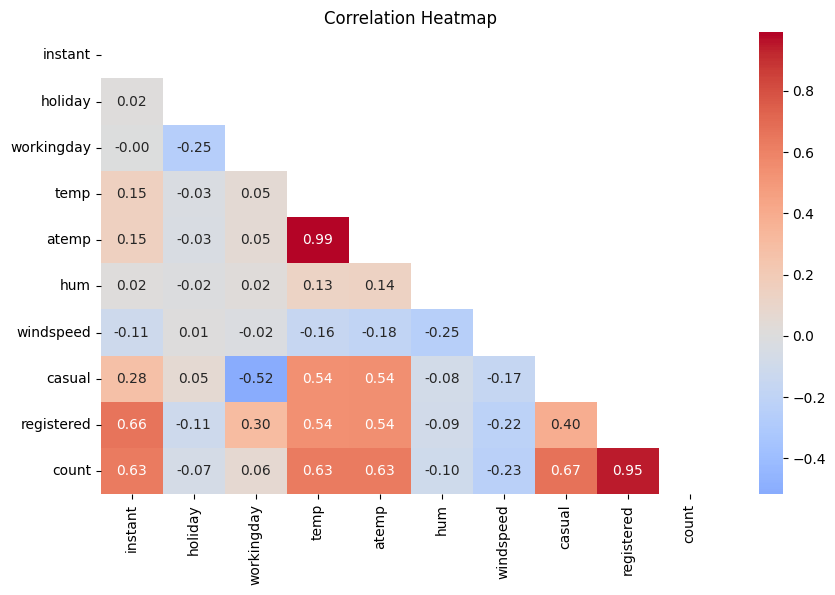

In [22]:
fig, ax = plt.subplots(figsize=(10,6))
correlation_matrix = bike_day_df.corr(numeric_only=True)
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

sns.heatmap(
    correlation_matrix,
    annot=True,
    mask=mask,
    cmap="coolwarm",
    center=0,
    fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

Berikut feature correlation positive yaitu
  1. 'atemp' dengan 'temp'
  2. 'count' dengan 'registered'

### Explore Data bike_hour_df

1. Parameter Statistik

In [23]:
# Membuat rangkuman parameter pada DataFrame bike_hour_df
bike_hour_df.describe(include="all")

,instant,dateday,season,year,month,hr,holiday,weekday,workingday,weather_cond,temp,atemp,hum,windspeed,casual,registered,count
count,17379.0000,17379,17379,17379,17379,17379.000000,17379.000000,17379,17379.000000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,NaN,4,2,12,NaN,NaN,7,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Fall,2012,May,NaN,NaN,Saturday,NaN,Clear,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,4496,8734,1488,NaN,NaN,2512,NaN,11413,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,2012-01-02 04:08:34.552045568,NaN,NaN,NaN,11.546752,0.028770,NaN,0.682721,NaN,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,NaN,NaN,NaN,0.000000,0.000000,NaN,0.000000,NaN,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,NaN,NaN,NaN,6.000000,0.000000,NaN,0.000000,NaN,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,NaN,NaN,NaN,12.000000,0.000000,NaN,1.000000,NaN,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,NaN,NaN,NaN,18.000000,0.000000,NaN,1.000000,NaN,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,NaN,NaN,NaN,23.000000,1.000000,NaN,1.000000,NaN,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
- Berdasarkan rangkuman parameter di atas, memperoleh informasi bahwa pada jumlah pemakaian casual berada di kisaran 0 sampai 367 orang dengan standar deviasi adalah 49.30
-

  2. Correlation Matrix

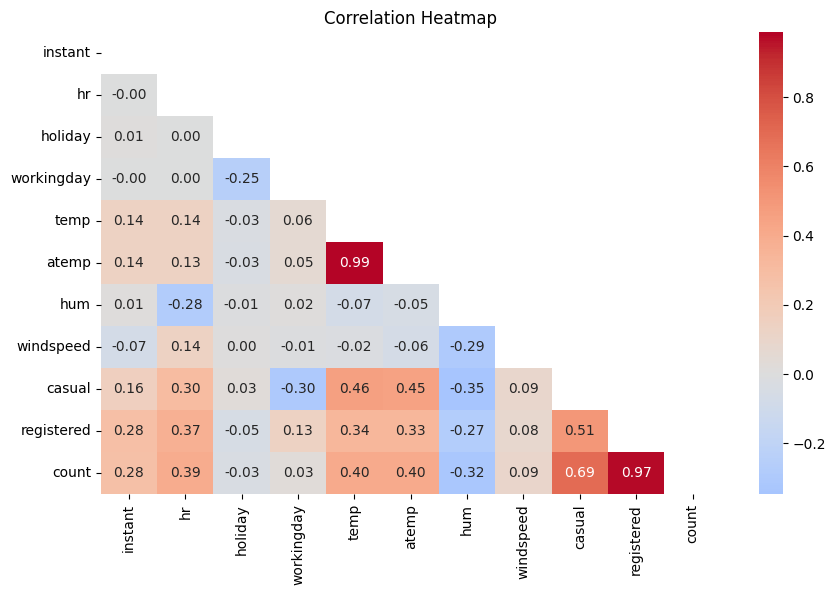

In [24]:
fig, ax = plt.subplots(figsize=(10,6))
correlation_matrix = bike_hour_df.corr(numeric_only=True)
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Buat matrix
sns.heatmap(
    correlation_matrix,
    annot=True,
    mask=mask,
    cmap="coolwarm",
    center=0,
    fmt=".2f")

# Mengatur Judul untuk subplot tersebut
plt.title("Correlation Heatmap")

# Menampilkan plot
plt.show()

Berikut feature correlation positive yaitu
  1. 'atemp' dengan 'temp'
  2. 'count' dengan 'registered'

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana musim dapat berpengaruh dalam penyewaan sepeda ?


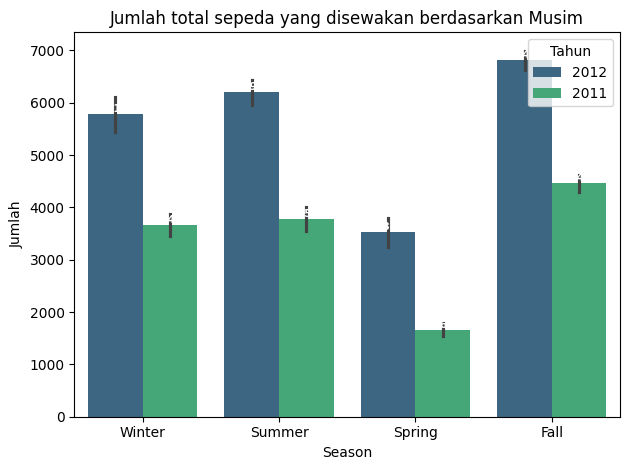

In [25]:
# Membuat suplot
fig, ax = plt.subplots()

# Membuat barplot
sns.barplot(
    data=bike_day_df.sort_values(by="season", ascending= False),
    x="season",
    y="count",
    hue="year",
    palette="viridis")

# Membuat judul, label X dan label Y
plt.ylabel("Jumlah")
plt.xlabel("Season")
plt.title("Jumlah total sepeda yang disewakan berdasarkan Musim")
plt.legend(
    title="Tahun",
    loc="upper right")

for container in ax.containers:
    ax.bar_label(container, fontsize= 8, color= 'white', weight= 'bold', label_type= 'edge')
plt.tight_layout()

# Menampilkan plot
plt.show()

**Insight:**
- Berdasarkan visualisasi data yang dibuat, dapat disimpulkan bahwa terdapat hubungan antara season dengan jumlam penyewa, yang paling diminati untuk menggunakan sepeda adalah season fall sedangkan sedikit menggunakan sepeda adalah season spring

### Pertanyaan 2: Bagaimana kepopuleran penyewaan sepeda dalam setahun terakhir, apakah 2011 atau 2012 ?


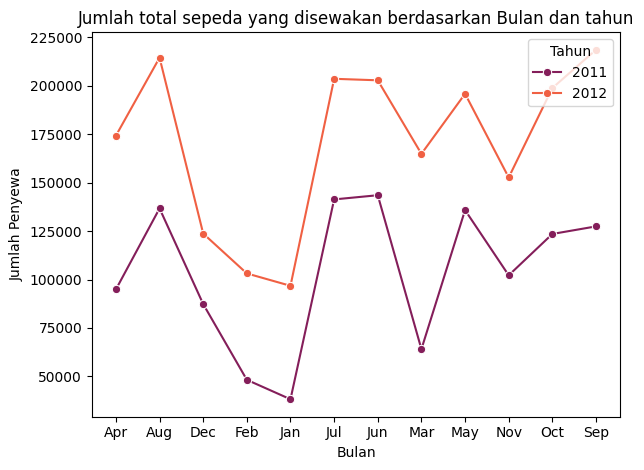

In [26]:
monthly_counts = bike_day_df.groupby(by=["month","year"]).agg({
    "count": "sum"
}).reset_index()

fig, ax = plt.subplots()

# Buat lineplot
sns.lineplot(
    data=monthly_counts,
    x="month",
    y="count",
    hue="year",
    palette="rocket",
    marker="o")

# Mengatur judul, label y, dan label x
plt.title("Jumlah total sepeda yang disewakan berdasarkan Bulan dan tahun")
plt.xlabel("Bulan")
plt.ylabel("Jumlah Penyewa")
plt.legend(title="Tahun", loc="upper right")
plt.tight_layout()

# Menampilkan plot
plt.show()

**Insight:**
- Berdasarkan visualisasi data yang dibuat, dapat disimpulkan bahwa terdapat kenaikan jumlah penyewaan sepeda dari tahun 2011 sampai 2012

### Pertanyaan 3: Bagaimana cuaca dapat mempengaruhi dalam penyewaan sepeda ?


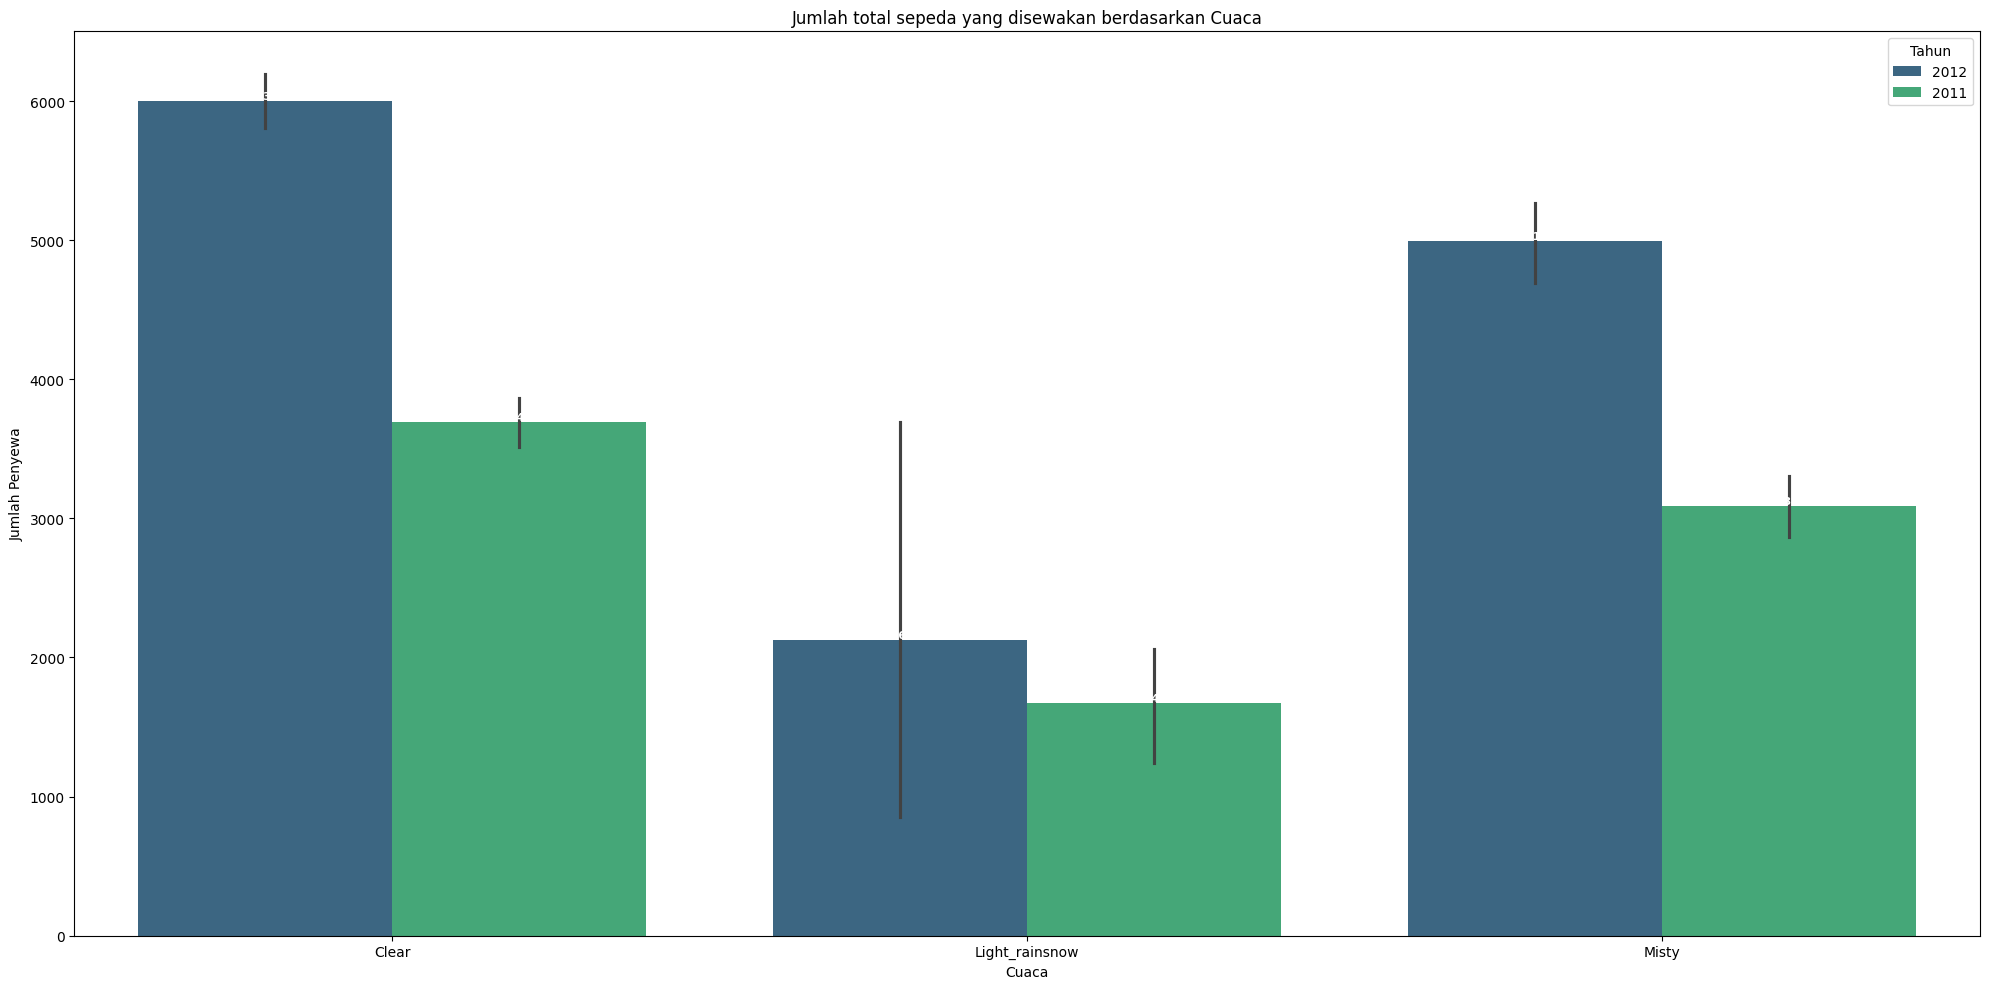

In [27]:
# membuat subplot
fig, ax = plt.subplots(figsize=(20, 10))

# Buat barplot
sns.barplot(
    data=bike_day_df.sort_values(by="weather_cond", ascending= True),
    x="weather_cond",
    y="count",
    hue="year",
    palette="viridis")

# Mengatur judul, label y, dan label x
plt.ylabel("Jumlah Penyewa")
plt.xlabel("Cuaca")
plt.title("Jumlah total sepeda yang disewakan berdasarkan Cuaca")
plt.legend(title="Tahun", loc="upper right")

for container in ax.containers:
    ax.bar_label(container, fontsize= 8, color= 'white', weight= 'bold', label_type= 'edge')
plt.tight_layout()

# Menampilkan plot
plt.show()

**Insight:**
- Berdasarkan visualisasi data yang dibuat, dapat disimpulkan bahwa cuaca yang cerah dapat membuat aktivitas manusia tidak terhambat dan beraktivitas menggunakan sepeda mengakibatkan naiknya jumlah penyewaan sepeda

### Pertanyaan 4: Berapa banyaknya seseorang yang memilih registered dibandingkan casual ?


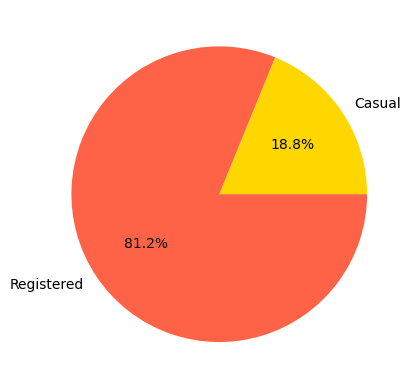

In [28]:
# Data Untuk Casual
total_casual = sum(bike_day_df['casual'])

# Data Untuk Registered
total_registered = sum(bike_day_df['registered'])

# Data untuk Pieplot
data = [total_casual, total_registered]
labels = ['Casual', 'Registered']

# Membuat label Pieplot
plt.pie(
    data,
    labels=labels,
    autopct='%1.1f%%',
    colors=["gold", "tomato"]
    )

# Menampilkan plot
plt.show()

### Pertanyaan 5: Apakah suhu lingkungan atau suhu yang dirasakan tubuh manusia dapat mempengaruhi jumlah penyewaan ?


1. Suhu Lingkungan

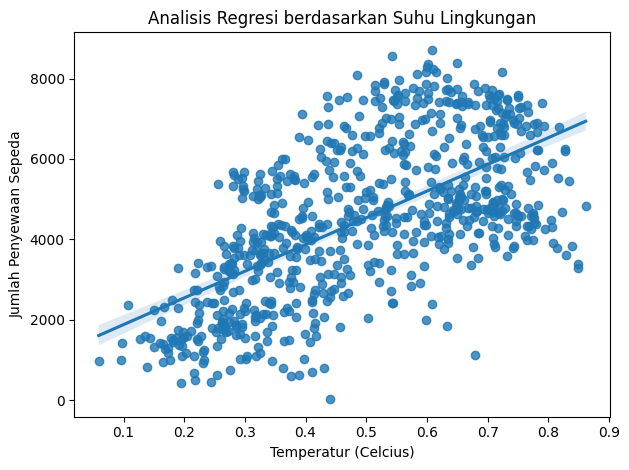

In [29]:
# Membuat Regplot
sns.regplot(
    x=bike_day_df["temp"],
    y=bike_day_df["count"])

# Membuat label Regplot
plt.title("Analisis Regresi berdasarkan Suhu Lingkungan")
plt.xlabel("Temperatur (Celcius)")
plt.ylabel("Jumlah Penyewaan Sepeda")
plt.tight_layout()

# Menampilkan plot
plt.show()

2. Suhu yang dirasakan tubuh

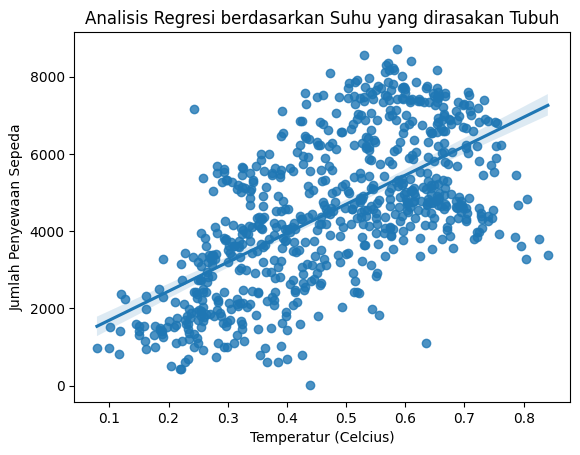

In [30]:
# Membuat Regplot
sns.regplot(
    x=bike_day_df["atemp"],
    y=bike_day_df["count"])

# Membuat label Regplot
plt.title("Analisis Regresi berdasarkan Suhu yang dirasakan Tubuh")
plt.xlabel("Temperatur (Celcius)")
plt.ylabel("Jumlah Penyewaan Sepeda")

# Menampilkan plot
plt.show()

In [31]:
bike_day_df.to_csv("day_clean_df.csv", index=False)
bike_hour_df.to_csv("hour_clean_df.csv", index=False)

## Analisis Lanjutan

1. RFM Analysis

Bertujuan dalam memahami pelanggan berdasarkan perilaku kegiatan mereka dengan memperhatikan tiga faktor utama:

- Recency: Menghitung berapa season terakhir kali user melakukan penyewaan sepeda.
- Frequency: Menghitung jumlah total penyewaan yang dilakukan oleh user dalam periode tertentu.
- Monetary: Menghitung waktu yang dihabiskan pelanggan dalam periode tersebut.

In [37]:
rfm_df = bike_hour_df.groupby(by="dateday", as_index=False).agg({
    "season": "max",      # mengambil season terakhir
    "count": "nunique",   # menghitung jumlah total penyewaan
    "hr": "sum"           # menghitung  waktu yang dihabiskan pelanggan
})

rfm_df.columns = ["Time", "Season", "Frequency", "Monetary"]

print(rfm_df.head())

        Time  Season  Frequency  Monetary
0 2011-01-01  Spring         22       276
1 2011-01-02  Spring         19       271
2 2011-01-03  Spring         19       271
3 2011-01-04  Spring         22       273
4 2011-01-05  Spring         19       273


## Conclusion

- Conclution pertanyaan 1: Berdasarkan visualisasi data yang dibuat, terlihat para penyewa menyukai season fall dimana season tersebut memiliki suhu yang sejuk dan cocok untuk mengendarai sepeda  sedikit menggunakan sepeda adalah season spring

- Conclution pertanyaan 2: Berdasarkan visualisasi data yang dibuat, dapat disimpulkan bahwa terdapat kenaikan jumlah penyewaan sepeda dari tahun 2011 sampai 2012.

- Conclution pertanyaan 3: Cuaca dilingkunyan yang cerah dapat memberikan semangat dalam aktivitas mengendarai sepeda dengan cara menyewa sepeda

- Conclution pertanyaan 4: Terdapat perbedaan jumlah user atau para penyewa yang Registered berada di presentase 81.2% dibandingan Casual di presentase 18.8%

- Conclution pertanyaan 5: Dari kedua analisa regresi dikatakan bahwa data suhu lingkungan atau suhu yang dirasakan tubuh memiliki hubungan dengan jumlah penyewaan sepeda